# Market Data

This notebook demonstrates getting market data from IEX Cloud using pyEX library.

I'm storing secrets natively in macOS KeyChain. You can use (keyring)[https://github.com/jaraco/keyring] to store / retrieve secrets from KeyChain. Again an excellent library to manage secrets using system keyring service (macOS KeyChain or Windows Credential Locker)

In [196]:
import pyEX as p
import pandas as pd
import numpy as np
import cufflinks as cf
import keyring
import os

cf.set_config_file(theme='space',offline=True)
data_files = (os.path.join(os.path.dirname(__file__), 'data_files') if '__file__' in locals() else 'data_files')
api_token = keyring.get_password('system', 'IEX_API_KEY')

## Create IEX Client

In [11]:
c = p.Client(api_token=api_token)

## Download Symbols / Exchanges / Sectors

In [17]:
symbols = c.symbolsDF()
exchanges = c.exchangesDF()
sectors = c.sectorsDF()

In [29]:
iexSymbols = c.iexSymbolsDF()

In [33]:
iexSymbols

,date,isEnabled
symbol,,
A,2020-04-13,True
AA,2020-04-13,True
AAAU,2020-04-13,True
AACG,2020-04-13,True
AADR,2020-04-13,True
...,...,...
ICXUSDT,2020-04-12,True
NEOUSDT,2020-04-12,True
VENUSDT,2020-04-12,True


In [53]:
tickers = ['AAPL', 'MSFT', 'INTC', 'AMZN', 'SPY', 'GDX', 'GLD', 'GS']
symbols[symbols.index.isin(tickers)]

,exchange,name,date,type,iexId,region,currency,isEnabled,figi,cik
symbol,,,,,,,,,,
AAPL,NAS,Apple Inc.,2020-04-13,cs,IEX_4D48333344362D52,US,USD,True,BBG000B9XRY4,320193
AMZN,NAS,Amazon.com Inc.,2020-04-13,cs,IEX_4D434E59594C2D52,US,USD,True,BBG000BVPV84,1018724
GDX,PSE,VanEck Vectors Gold Miners ETF,2020-04-13,et,IEX_52345137584E2D52,US,USD,True,BBG000PLNQN7,None
GLD,PSE,SPDR Gold Trust,2020-04-13,et,IEX_475A4A4C52572D52,US,USD,True,BBG000CRF6Q8,None
GS,NYS,Goldman Sachs Group Inc.,2020-04-13,cs,IEX_4A4C4A30565A2D52,US,USD,True,BBG000C6CFJ5,886982
INTC,NAS,Intel Corporation,2020-04-13,cs,IEX_485A365A37512D52,US,USD,True,BBG000C0G1D1,50863
MSFT,NAS,Microsoft Corporation,2020-04-13,cs,IEX_5038523343322D52,US,USD,True,BBG000BPH459,789019
SPY,PSE,SPDR S&P 500 ETF Trust,2020-04-13,et,IEX_4D3735424E4B2D52,US,USD,True,BBG000BDTBL9,884394


## Download Historical Prices

In [54]:
prices = c.bulkBatchDF(tickers, 'chart', range_="5y")

In [59]:
prices['chart'].to_csv(f'{data_files}/prices.csv')

In [60]:
prices = prices['chart']

In [116]:
# Historical Prices
prices

,change,changeOverTime,changePercent,close,high,label,low,open,symbol,uClose,uHigh,uLow,uOpen,uVolume,volume
date,,,,,,,,,,,,,,,
2015-04-10,0.00,0.000000,0.0000,127.10,127.21,"Apr 10, 15",125.26,125.95,AAPL,127.10,127.21,125.26,125.95,40187953,40187953
2015-04-13,-0.25,-0.001967,-0.1967,126.85,128.57,"Apr 13, 15",126.61,128.37,AAPL,126.85,128.57,126.61,128.37,36365123,36365123
2015-04-14,-0.55,-0.006294,-0.4336,126.30,127.29,"Apr 14, 15",125.91,127.00,AAPL,126.30,127.29,125.91,127.00,25524593,25524593
2015-04-15,0.48,-0.002518,0.3800,126.78,127.13,"Apr 15, 15",126.01,126.41,AAPL,126.78,127.13,126.01,126.41,28970419,28970419
2015-04-16,-0.61,-0.007317,-0.4811,126.17,127.10,"Apr 16, 15",126.11,126.28,AAPL,126.17,127.10,126.11,126.28,28368987,28368987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03,0.00,-0.248978,0.0000,146.93,150.92,"Apr 3, 20",145.23,149.20,GS,146.93,150.92,145.23,149.20,2801582,2801582
2020-04-06,11.30,-0.191219,7.6907,158.23,158.93,"Apr 6, 20",153.77,155.47,GS,158.23,158.93,153.77,155.47,4689431,4689431
2020-04-07,7.79,-0.151401,4.9232,166.02,169.14,"Apr 7, 20",162.45,166.00,GS,166.02,169.14,162.45,166.00,4953506,4953506


### Pivot the Prices dataframe by symbol and closing price

In [77]:
hist_prices = prices.reset_index()[['date', 'symbol', 'close']]

In [87]:
hist_prices = pd.pivot_table(hist_prices, index='date', columns='symbol', values='close')

In [95]:
hist_prices

symbol,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
date,,,,,,,,
2015-04-10,127.10,382.65,19.45,115.97,195.64,31.93,41.72,210.04
2015-04-13,126.85,382.36,19.26,115.14,195.58,31.73,41.76,209.09
2015-04-14,126.30,385.11,19.41,114.44,197.72,31.49,41.65,209.49
2015-04-15,126.78,383.45,19.98,115.43,201.10,32.83,42.26,210.43
2015-04-16,126.17,386.04,19.74,115.03,200.21,32.87,42.16,210.37
...,...,...,...,...,...,...,...,...
2020-04-03,241.41,1906.59,24.95,152.65,146.93,54.13,153.83,248.19
2020-04-06,262.47,1997.59,26.34,156.88,158.23,58.43,165.27,264.86
2020-04-07,259.43,2011.60,26.09,156.04,166.02,58.40,163.49,265.13


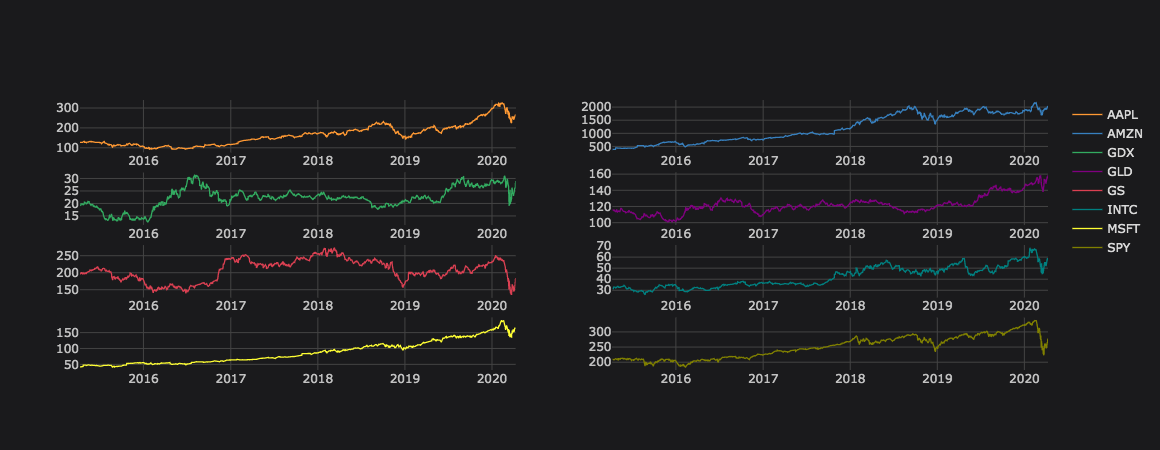

In [198]:
hist_prices.iplot(subplots=True)

### Calculate Stats

In [96]:
hist_prices.mean()

symbol
AAPL     163.674913
AMZN    1200.687167
GDX       22.220667
GLD      122.161817
GS       207.680595
INTC      42.119119
MSFT      87.614722
SPY      250.202048
dtype: float64

In [99]:
hist_prices.aggregate([min, np.mean, np.std, np.median, max]).round(2)

,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
min,90.34,375.56,12.47,100.50,134.97,25.87,40.47,182.86
mean,163.67,1200.69,22.22,122.16,207.68,42.12,87.61,250.20
std,53.44,531.22,4.14,11.08,31.48,9.51,35.95,37.38
median,156.68,1007.93,22.41,120.82,210.75,39.46,76.15,249.20
max,327.20,2170.22,31.32,158.69,273.38,68.47,188.70,338.34


### Calculate Percent Change over time

In [101]:
hist_prices.pct_change().round(3).head()

symbol,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
date,,,,,,,,
2015-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-13,-0.002,-0.001,-0.010,-0.007,-0.000,-0.006,0.001,-0.005
2015-04-14,-0.004,0.007,0.008,-0.006,0.011,-0.008,-0.003,0.002
2015-04-15,0.004,-0.004,0.029,0.009,0.017,0.043,0.015,0.004
2015-04-16,-0.005,0.007,-0.012,-0.003,-0.004,0.001,-0.002,-0.000


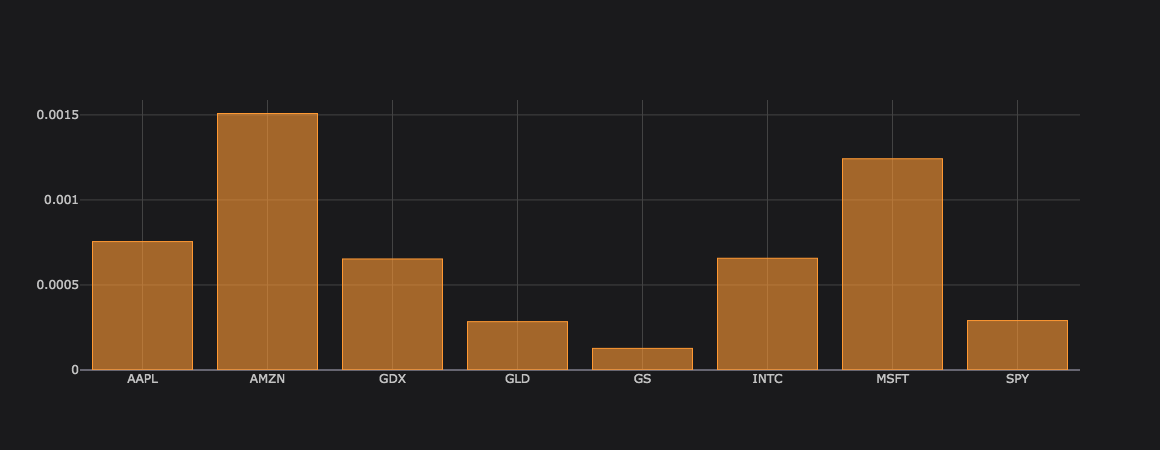

In [199]:
hist_prices.pct_change().mean().iplot(kind='bar')

### Calculate Returns (log)

In [104]:
returns = np.log(hist_prices / hist_prices.shift(1))

In [107]:
returns.head().round(4)

symbol,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
date,,,,,,,,
2015-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-13,-0.0020,-0.0008,-0.0098,-0.0072,-0.0003,-0.0063,0.0010,-0.0045
2015-04-14,-0.0043,0.0072,0.0078,-0.0061,0.0109,-0.0076,-0.0026,0.0019
2015-04-15,0.0038,-0.0043,0.0289,0.0086,0.0170,0.0417,0.0145,0.0045
2015-04-16,-0.0048,0.0067,-0.0121,-0.0035,-0.0044,0.0012,-0.0024,-0.0003


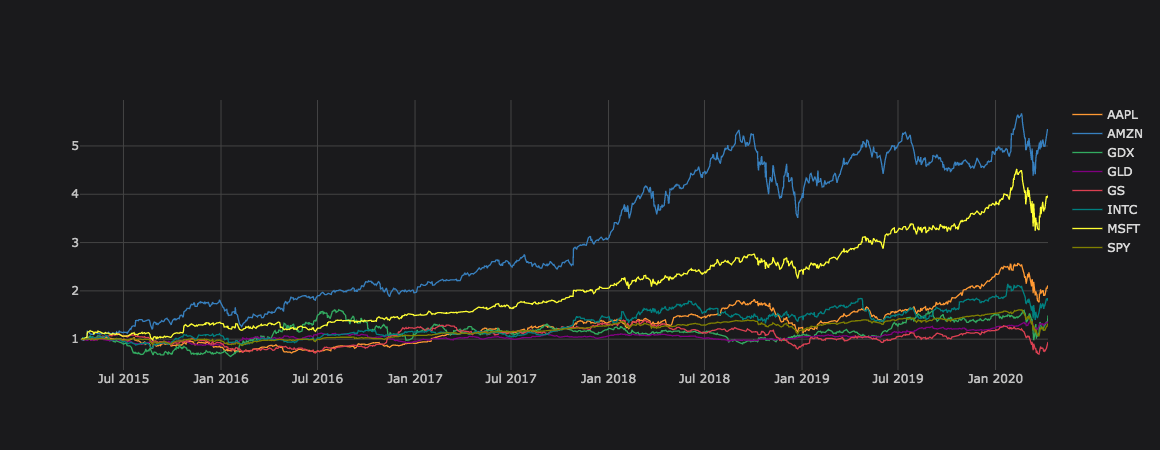

In [200]:
returns.cumsum().apply(np.exp).iplot()

### Resample

In [126]:
monthly_returns = returns.cumsum().apply(np.exp).resample('1m', label='right').last()
monthly_returns.head()

symbol,AAPL,AMZN,GDX,GLD,GS,INTC,MSFT,SPY
date,,,,,,,,
2015-04-30,0.984658,1.102261,1.033933,0.978443,1.003987,1.019417,1.165868,0.992478
2015-05-31,1.025020,1.121730,1.006684,0.983875,1.053926,1.079236,1.123202,1.005237
2015-06-30,0.986861,1.134431,0.913111,0.968957,1.067215,0.952709,1.058245,0.980051
2015-07-31,0.954367,1.401150,0.706941,0.904803,1.048201,0.906671,1.119367,1.002190
2015-08-31,0.887175,1.340363,0.725450,0.938346,0.964016,0.893830,1.043145,0.941106


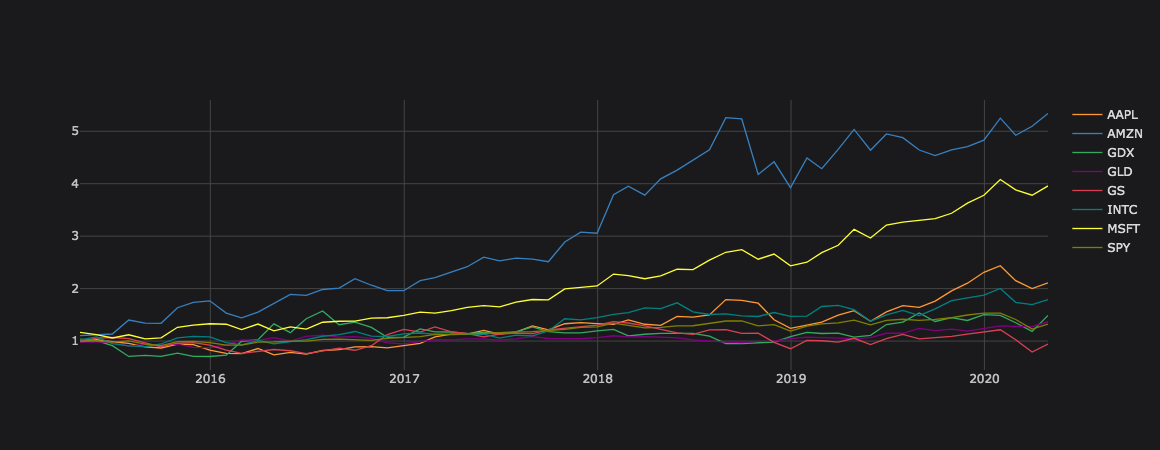

In [201]:
monthly_returns.iplot()

### Rolling Stats

In [137]:
window = 20
symbol = 'AAPL'

data = pd.DataFrame(hist_prices[symbol])
data['min'] = data[symbol].rolling(window=window).min()
data['mean'] = data[symbol].rolling(window=window).mean()
data['max'] = data[symbol].rolling(window=window).max()
data['std'] = data[symbol].rolling(window=window).std()
data['median'] = data[symbol].rolling(window=window).median()
data['ewma'] = data[symbol].ewm(halflife=0.5, min_periods=window).mean()

In [138]:
data

,AAPL,min,mean,max,std,median,ewma
date,,,,,,,
2015-04-10,127.10,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-13,126.85,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-14,126.30,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,126.78,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-16,126.17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-04-03,241.41,224.37,251.4100,285.34,15.265448,247.31,242.244707
2020-04-06,262.47,224.37,251.2250,285.34,15.098668,247.31,257.413677
2020-04-07,259.43,224.37,249.9295,277.97,12.980447,247.31,258.925919


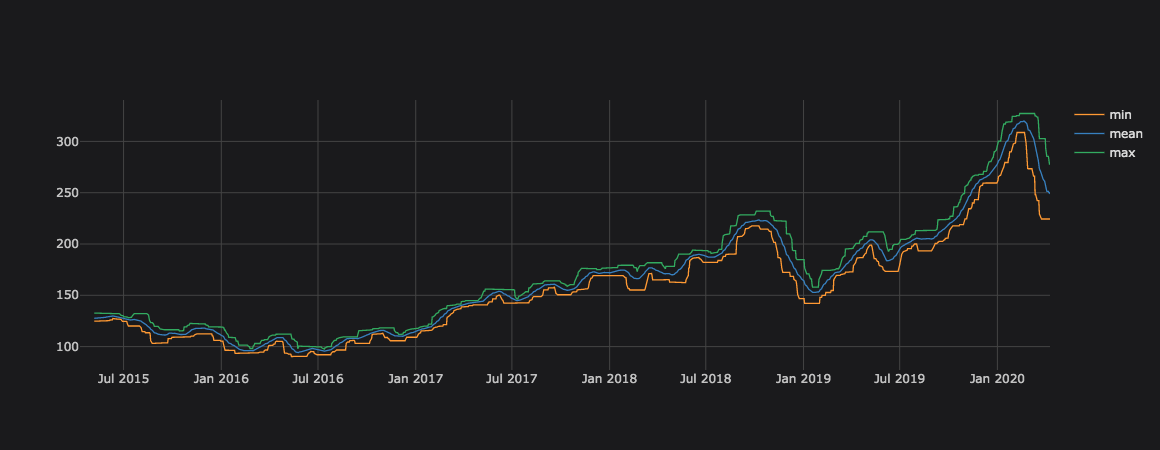

In [202]:
data[['min', 'mean', 'max']].iplot()

In [141]:
data['SMA1'] = data[symbol].rolling(window=42).mean()
data['SMA2'] = data[symbol].rolling(window=252).mean()
data

,AAPL,min,mean,max,std,median,ewma,SMA1,SMA2
date,,,,,,,,,
2015-04-10,127.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-13,126.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-14,126.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-15,126.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-16,126.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-04-03,241.41,224.37,251.4100,285.34,15.265448,247.31,242.244707,280.658333,239.365516
2020-04-06,262.47,224.37,251.2250,285.34,15.098668,247.31,257.413677,279.254048,239.625317
2020-04-07,259.43,224.37,249.9295,277.97,12.980447,247.31,258.925919,277.687857,239.860754


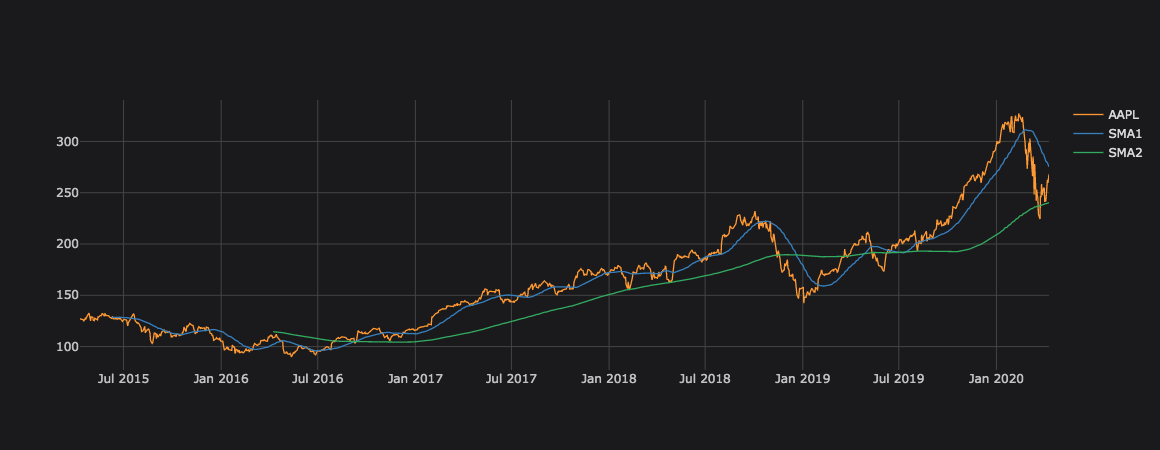

In [203]:
data[[symbol, 'SMA1', 'SMA2']].iplot()

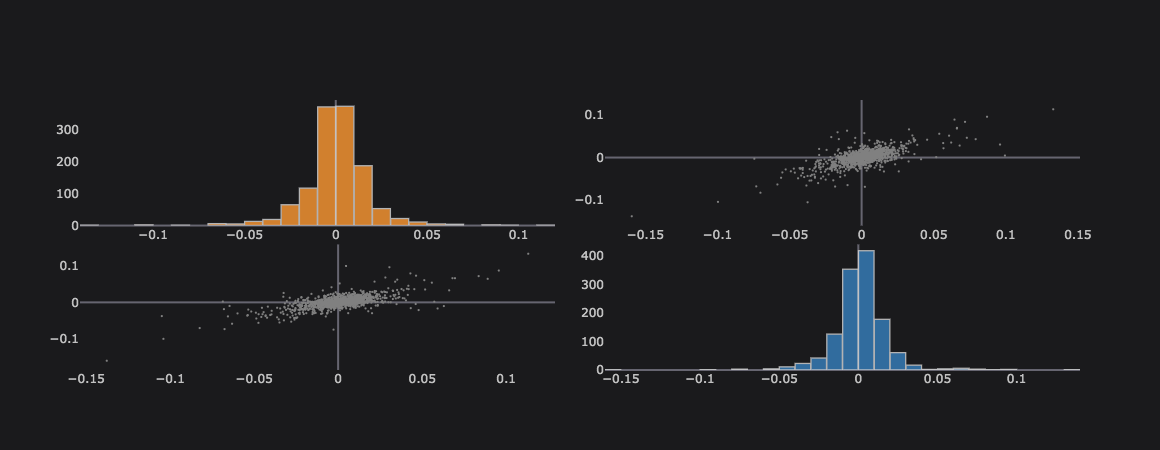

In [208]:
fig = returns[['AAPL', 'MSFT']].scatter_matrix(asFigure=True, bins=35)
cf.iplot(fig)

### Correlation

In [217]:
returns[['AAPL', 'MSFT', 'SPY', 'GLD']].corr()

symbol,AAPL,MSFT,SPY,GLD
symbol,,,,
AAPL,1.000000,0.696044,0.769481,-0.063532
MSFT,0.696044,1.000000,0.825563,-0.069232
SPY,0.769481,0.825563,1.000000,-0.052612
GLD,-0.063532,-0.069232,-0.052612,1.000000


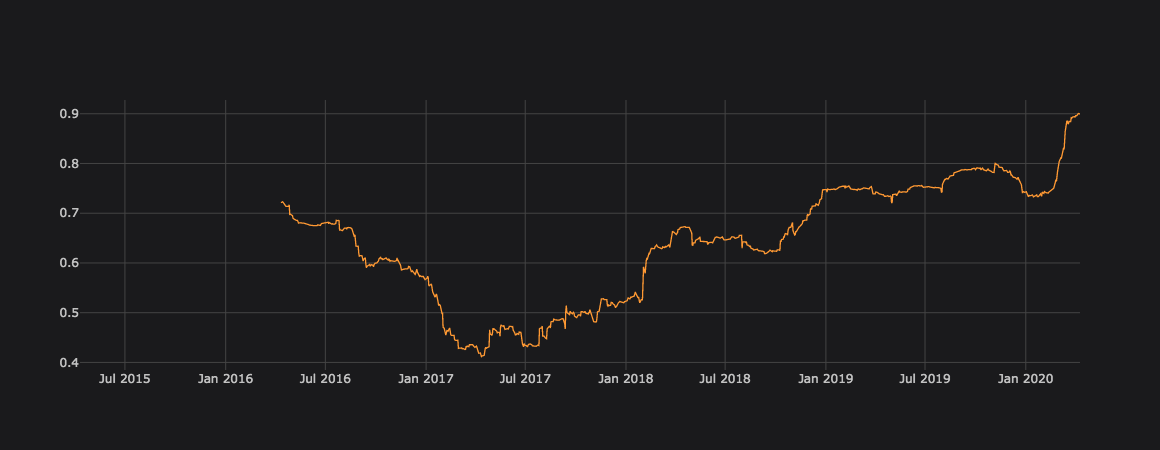

In [218]:
returns['AAPL'].rolling(window=252).corr(returns['SPY']).iplot()